<a href="https://colab.research.google.com/github/hsetyiupaing/MandalayEarthquakeAnalysis/blob/main/MandalayEarthquake2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

On **March 28, 2025**, a powerful earthquake striked on the **Central Myanmar** at approximately **12:50:52(UTC 06:20:52)** causing the massive destruction across the several regions. The earthquake severely impacted **Mandalay**, **Sagaing**, and **Nay Pyi Taw** leading sagnificant human loss, property damages and infracture damages.


## Downloading
Downloading the dataset

In [25]:
!pip install kagglehub

In [26]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



mv: cannot stat 'kaggle.json': No such file or directory


In [27]:
!kaggle datasets download -d minsithu/myanmar-earthquake-2025-report

Dataset URL: https://www.kaggle.com/datasets/minsithu/myanmar-earthquake-2025-report
License(s): CC0-1.0
myanmar-earthquake-2025-report.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
!unzip myanmar-earthquake-2025-report.zip -d ./data


Archive:  myanmar-earthquake-2025-report.zip
replace ./data/report.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [29]:
import os
os.listdir('./data')


['report.json']

In [30]:
import folium
from folium.plugins import HeatMap

# Example coordinates (replace/add more as needed)
heat_data = [
    [21.9162, 95.9560, 7.7],  # Epicenter (lat, lon, magnitude as weight)
    [22.0, 96.0, 5],
    [21.8, 95.9, 4],
    [21.7, 95.85, 3]
]

# Center the map around the epicenter
m = folium.Map(location=[21.9162, 95.9560], zoom_start=6)

# Add heat map
HeatMap(heat_data, radius=25, max_val=10, blur=15).add_to(m)

m  # Display map in Colab


/tmp/ipython-input-268467865.py:16: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, radius=25, max_val=10, blur=15).add_to(m)


## Importing

In [31]:
import json
import os

import pandas as pd
import matplotlib.pyplot as plt

### Opening Json

In [32]:
JSON_PATH = "data/report.json"

if not os.path.exists(JSON_PATH):
    print(f"File {JSON_PATH} not found")

with open(JSON_PATH, 'r') as f:
    data = json.load(f)

# Casualties Analysis

The data followed is the casualties from the earthquake


In [48]:
casualties = data.get('casualties')

total_casulties = casualties.get('total')
deaths = total_casulties.get('deaths')
injured = total_casulties.get('injured')
missing = total_casulties.get('missing')

regional_casulties  = casualties.get('by_region')

## Total Casualties
  Total Casualties table shows that the earthquake causes 5313 deaths, 11366 in jured, and 1111 missing people, highlighting that overall impact on the population.

In [34]:
df_casulties = pd.DataFrame.from_dict(total_casulties, orient='index', columns=['Total'])
df_casulties

,Total
deaths,5313
injured,11366
missing,1111


## Regional Analysis
The regional bar chart further shows that Manadalay is the most damaged state from earthquake, accounting that over 3,000 deaths, 6,000 injuried, and 8,00 missing people, followed by Nay Pyi Taw and Sagaing. Bago and Southern Shan State are the least affected regions amoung all the affected regions.

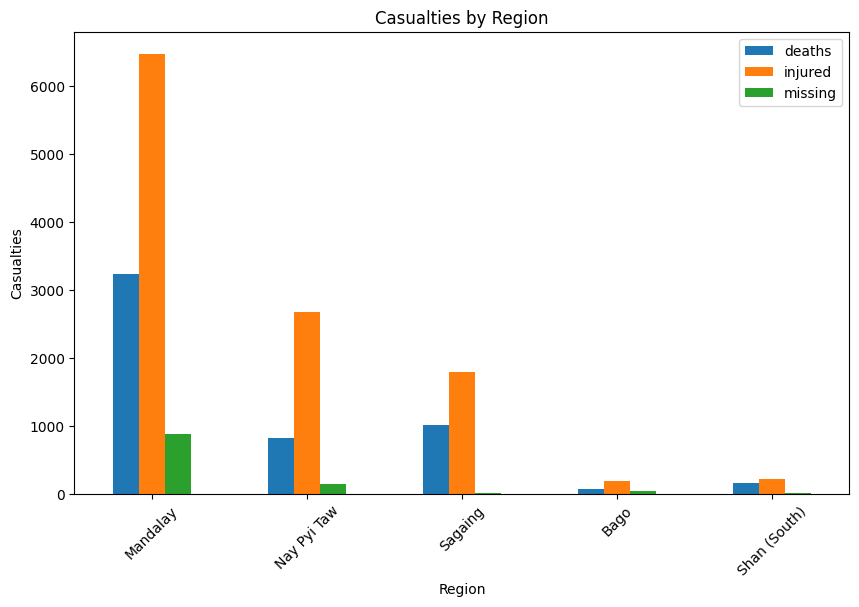

In [35]:
df_regional_casualties = pd.DataFrame(regional_casulties)

df_regional_casualties.plot(x = 'region', y = ['deaths','injured','missing'], kind = 'bar', figsize=(10,6))
plt.title('Casualties by Region')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Casualties')
plt.show()

---

# Damage Analysis
The data below is the data from displacement of the Myanmar Earthquake 2025

In [36]:
displacement = data.get('displacement')

total_displacement = displacement.get('total')
households = displacement.get('households')
persons = displacement.get('persons')

## Total Displacement
The table below is the total displacement for the Myanmar Earthquake 2025. The earthquake causes 10197 households damaged and 47451 casualties

In [37]:
df_displacement = pd.DataFrame.from_dict(total_displacement, orient='index', columns=['Total'])
df_displacement

,Total
households,10197
persons,47451


## Regional Displacement
The following graph shows that Mandalay was the most damaged victim in this earthquake. With 6,245 households and 30,160 persons are damaged, followed by Sagaing with 1,950 households and 8,775 people, and Nay Pyi Taw with 880 households and 3,971 casualties.Southern Shan State had 1,107 households and 4,485 casualties.  The least damaged province amoung all is Bago with 15 households and 60 casualties

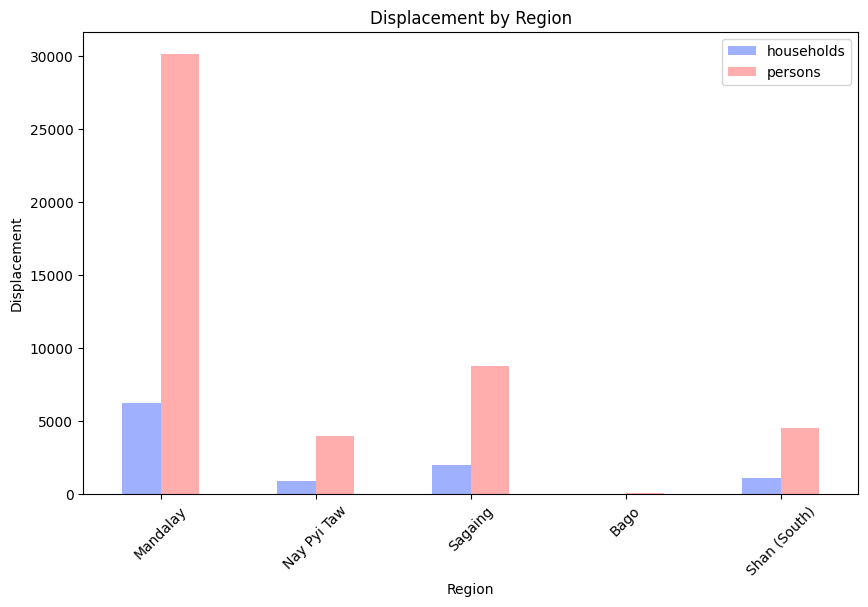

In [38]:
regional_displacement = displacement.get('by_region')

df_regional_displacement = pd.DataFrame(regional_displacement)

df_regional_displacement.plot(
    x = 'region',
    y = ['households','persons'],
    kind = 'bar',
    figsize= (10,6),
    colormap = 'berlin'
)
plt.title('Displacement by Region')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Displacement')
plt.show()

## Religious Buildings Damaged
The earthquake damaged 787 religious buildings including 313 monasteries, 105 buddhist nunneries,208 pagodas, 49 mosques, 14 hindu tamples, 13 churches, and 14 chinese tamples.

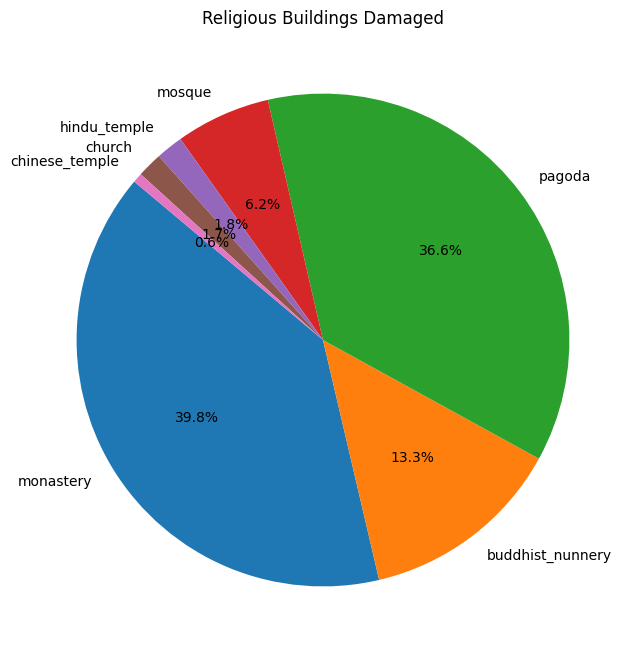

In [39]:
rbd = data.get('religious_buildings_damaged')

total = rbd.get('total')

df_total_rbd = pd.DataFrame(list(total.items()), columns=['Category', 'Count'])

plt.figure(figsize=(8, 8))
plt.pie(df_total_rbd['Count'], labels=df_total_rbd['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Religious Buildings Damaged')
plt.show()

## Infracture Damage
The data below is the infracture damage from the earthquake

In [40]:
infra = data.get('infrastructure_damage')

airports = infra.get('airports')
roads = infra.get('roads')
bridges = infra.get('bridges')
utilities = infra.get('utilities')


### Airport Damage
The earthquake causes **Tada-U airport** to be damaged leading to flights unable to land, Collapsation of Control tower and **Nay Pyi Taw Airport**. However, **Heho Airport** in Southen Shan Region is not damaged.

In [41]:
df_airports = pd.DataFrame(airports)
df_airports



,region,facility,status
0,Mandalay,Tada-U Airport,"Damaged, flights cannot land"
1,Nay Pyi Taw,Control tower,"Collapsed, only rescue flights permitted"
2,Shan (South),Heho Airport,Not damaged


### Roads Damage

Roads in **Mandalay** suffered modrate damage, some roads creacked and broken, and some bolcked. Roads in **Nay Pyi Taw** suffered modrate damage, main roads cracked and bent, and damaged roundabouts. Roads in **Sagaing** damaged saverely, main roads are cracked, bended, and gained siginificant damage. Roads in **Bago** gained moderate damage causing main roads with cracks, bends, and signigicant damage. However, **Southern Shan** state didn't have damage

In [42]:
df_roads = pd.DataFrame(roads)
df_roads

,region,status
0,Mandalay,"Moderate damage, some roads cracked and broken..."
1,Nay Pyi Taw,"Moderate damage, main roads cracked and bent, ..."
2,Sagaing,"Severe damage, main roads with cracks, bends, ..."
3,Bago,"Moderate damage, roads with cracks, bends, and..."
4,Shan (South),No damage


### Bridges Damage

A total of 5 bridges are destroyed in **Mandalay**. **Old Sagaing Bridge** is collapsed and **New Sagaing Bridge** have to be restricted but no major damage on bridges in **Nay Pyi Taw** and **Southern Shan**

In [43]:
df_bridges = pd.DataFrame(bridges)
df_bridges

,region,status
0,Mandalay,Five bridges (large and small) destroyed
1,Nay Pyi Taw,No major destruction of bridges
2,Sagaing,"Old Sagaing Bridge collapsed, new bridge restr..."
3,Bago,Some bridges damaged
4,Shan (South),Not damaged


### Utlities Damage
In utilites, Power stations and lamp posts collapsed, electricity is unavailable in many areas across all affected regions. Phone tower mastsare damaged and phone calls and internet services are not functioning normally across all affected areas

In [44]:
df_utilities = pd.DataFrame.from_dict(utilities, orient='index', columns=['Status'])
df_utilities


,Status
electricity,"Power stations and lamp posts collapsed, elect..."
communications,"Phone tower masts damaged, phone calls and int..."


---

# Aid Analysis

 We gained aids from the international and domestic. The data below is the international aid and domestic aid

In [45]:
i_aid = data.get('international_aid')
d_aid = data.get('domestic_aid')

## International Aid
We gian aids from different contries as the international aid. **China** contributed the most aid with **34%**, followed by **Russia** with **14.2%**, and **Philippines** with **10.7%**. The other countries such as **Singapore**, **Hong Kong**, **Vietnum**, **Bangladesh**, **Thailand**, and **Malaysia** contribute the rest ranging from **3%** - **5%**

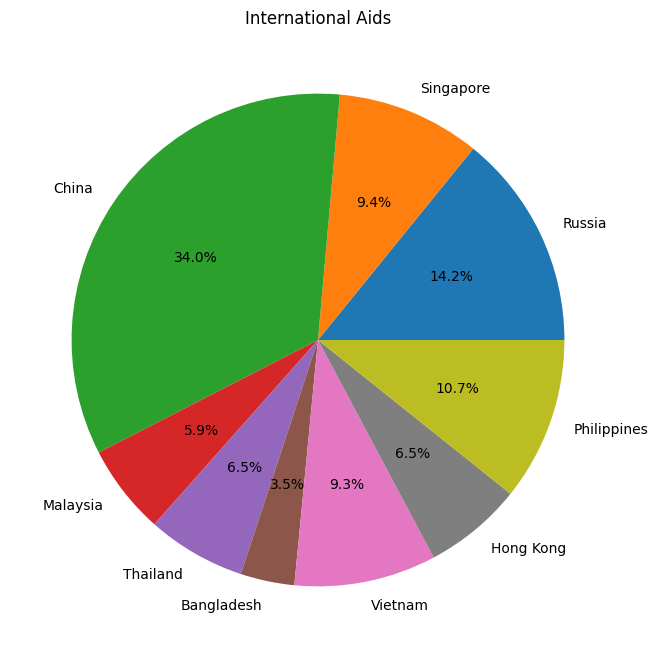

In [46]:
teams = i_aid.get('rescue_teams')
df_teams = pd.DataFrame(teams)

plt.figure(figsize=(8, 8))
plt.pie(df_teams['team_size'], labels=df_teams['country'], autopct = '%1.1f%%', startangle = 0 )
plt.title("International Aids")
plt.show()

## Domestic Aid

We also gain aids domistically. **KBZ bank** contributes the most with **34.5%**,

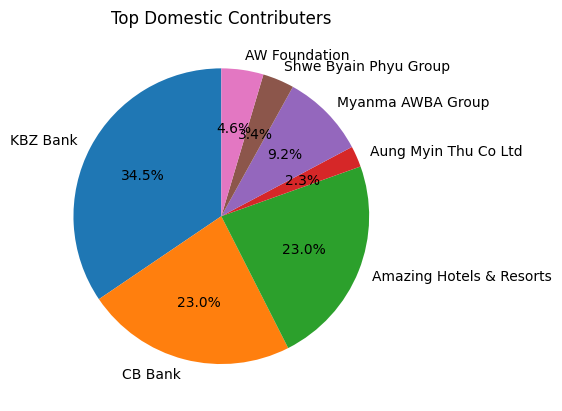

In [47]:
top_d_aid = d_aid.get('top_contributors')
df_top_d_aid = pd.DataFrame(top_d_aid)

df_top_d_aid['amount_numeric'] = (
    df_top_d_aid['amount']
    .str.replace(',', '')
    .str.extract(r'(\d+)')
    .astype(float)
)

plt.figsize = (8, 8)
plt.pie(
    df_top_d_aid['amount_numeric'],
    labels=df_top_d_aid['donor'],
    autopct= '%1.1f%%',
    startangle= 90
)
plt.title('Top Domestic Contributers')
plt.show()